# Part II - (Prosper Loan Data)
## by (Ismail Omodara)

## Investigation Overview

The purpose of this analysis was to be able to determine the features that affect the outcome of a loan, how these features are related to one another and using those features to be able to predict possible outcome of loans. Our main focus was on Term, LoanStatus, ProsperScore, and BorrowerRate.


## Dataset Overview

The original dataset consisted of about 113,937 entries with 81 unique variables. For the purpose of focused analysis, we picked 14 out of the 81 unique variables and performed data wrangling to clean up entries which resulted in us having to work with a dataset of 95,169 entries and 14 unique features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanDataClean.csv')

## Distribution of Loan Term

We can see that close to 80% of the listings were scheduled for a duration of 36 months (3 years) for payback. It seems like most borrowers are convenient with this period as it creates better timeline and payback schedule for them to ensure they do not default or past due date.

Text(0, 0.5, 'Frequency')

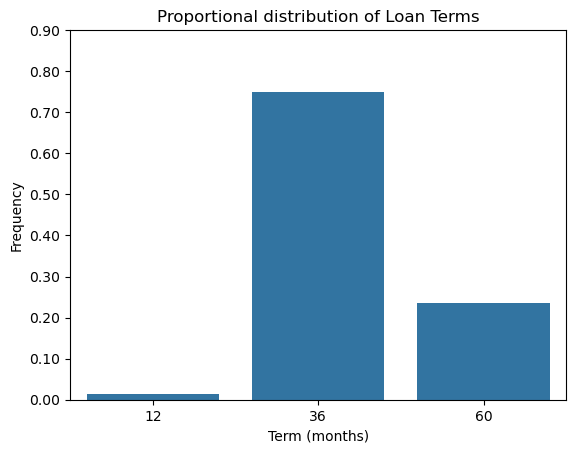

In [3]:
sb.countplot(data = loans, x = "Term", color = sb.color_palette()[0]);

tick_props = np.arange(0, 1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.title("Proportional distribution of Loan Terms")

plt.xlabel("Term (months)")

plt.yticks(tick_props * loans.shape[0], tick_names);
plt.ylabel("Frequency")



## Distribution of Loan Status

Approximately 40% of the loans have been completed (Completed or Chargedoff), which indicates there's a high completion rate. Borrowers tend to complete their loans, which means we would be able to get facters that contribute to this behaviour

In [4]:
# Convert LoanStatus to categorical data in right sort

categories = ['Current', 'Completed', 'FinalPaymentInProgress',
                  'Past Due (1-15 days)', 'Past Due (31-60 days)',
                  'Past Due (91-120 days)', 'Past Due (61-90 days)',
                  'Past Due (16-30 days)',
                  'Past Due (>120 days)', 'Chargedoff', 'Defaulted', 'Cancelled']
statuses = pd.api.types.CategoricalDtype(categories=categories)

loans['LoanStatus'] =  loans['LoanStatus'].astype(statuses);

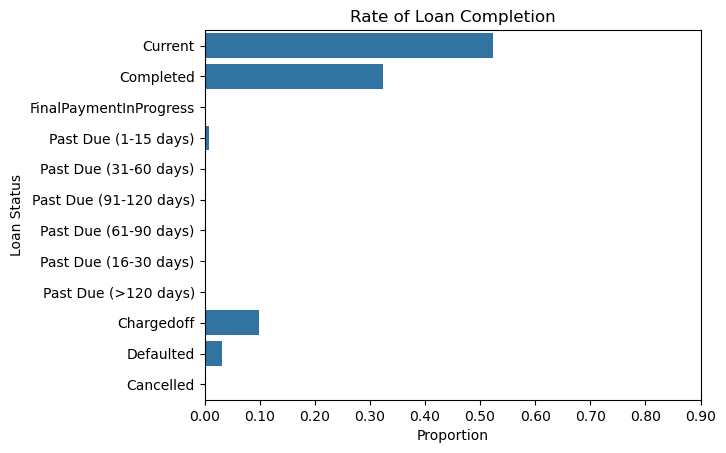

In [5]:
sb.countplot(data = loans, y = "LoanStatus", color = sb.color_palette()[0]);

tick_props = np.arange(0, 1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


plt.title("Rate of Loan Completion")

plt.xticks(tick_props * loans.shape[0], tick_names);
plt.xlabel("Proportion")

plt.ylabel("Loan Status");

## Distribution of Interest Rate

There seem to be a spike in the 0.3% interest rate. This should be able to tell us if there are conditions that predetermined the interest on a loan.

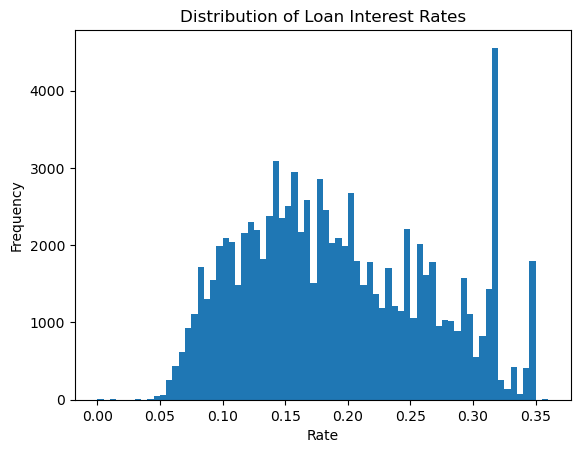

In [6]:
bins = np.arange(0, loans.BorrowerRate.max()+0.005, 0.005)
    
plt.hist(data = loans, x = "BorrowerRate", bins = bins)

plt.title("Distribution of Loan Interest Rates")
plt.xlabel("Rate")
plt.ylabel("Frequency");

## Term vs Loan Status

Most borrowers who have completed their loans or in the process of doing that tend to have a repayment period of 36 months (3 years). It is possible that this duration is associated with how comfortable it would be to repay the loan.

Text(0, 0.5, 'Loan Status')

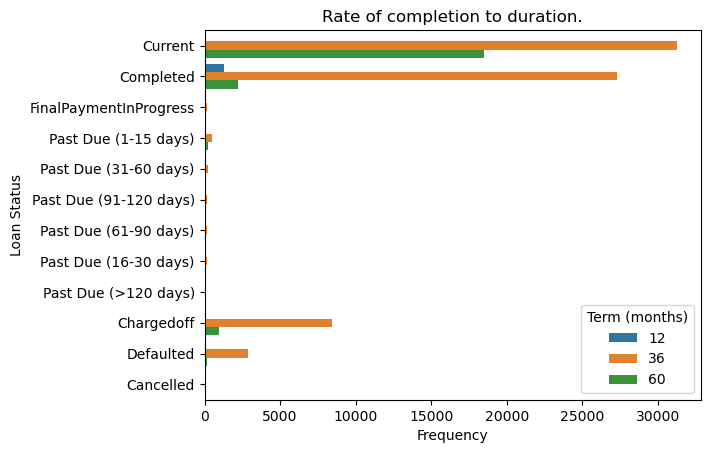

In [7]:
sb.countplot(data=loans, y='LoanStatus', hue='Term');

plt.title("Rate of completion to duration.")
plt.legend(title="Term (months)");

plt.xlabel("Frequency");
plt.ylabel("Loan Status")

## ProsperScore vs BorrowerRate

There is an inverser relationship between the interest rate a borrower gets and thier ProsperScore (level of risk)

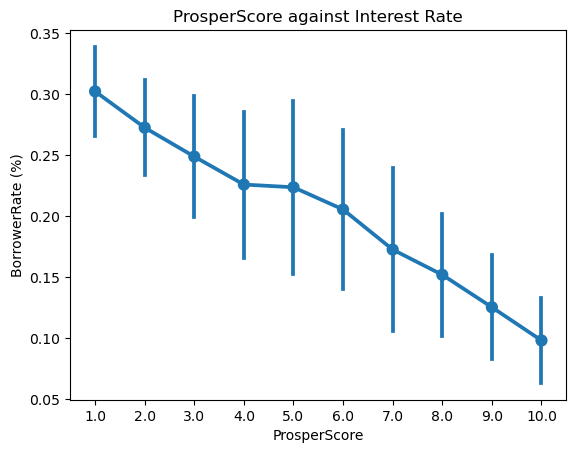

In [8]:
sb.pointplot(data=loans, x='ProsperScore', y='BorrowerRate', errorbar='sd');

plt.title("ProsperScore against Interest Rate");

plt.xlabel("ProsperScore");
plt.ylabel("BorrowerRate (%)");

## Predicting Loan Status with of ProsperScore

The exploration among the three variables gave further insights into assumptions. A high ProsperScore tend to get the loan borrower a low BorrowerRate, which means the ProsperScore telling us the level of risk for the loan and borrower can influence the interest rate on the loan amount and also predict possible outcome of the loan.

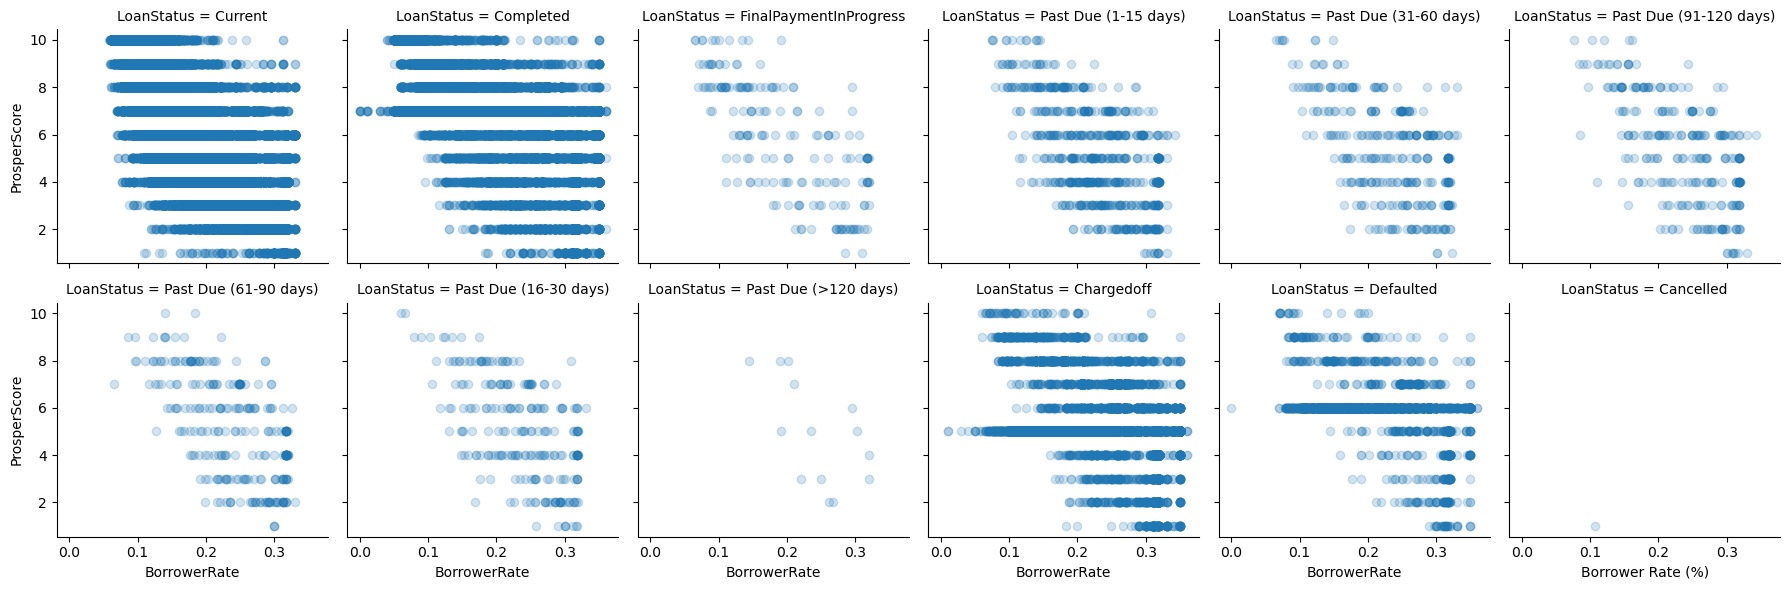

In [9]:
g = sb.FacetGrid(data = loans, col = 'LoanStatus', col_wrap = 6)
g.map(plt.scatter, 'BorrowerRate', 'ProsperScore', alpha = 1/5);

plt.xlabel("Borrower Rate (%)");

## Thank you for your time.

In [ ]:
!jupyter nbconvert Prosper_Loans_Data_Part2.ipynb --to slides --post serve --no-input --no-prompt